# Item Item Collaborative Filtering for Book Recommendations

In [1]:
import sys

import matplotlib
import pandas as pd
import numpy as np
import scipy as sp

sys.path.insert(0, '../src/')
import item_collaborative_filtering      

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


## Exploratory Analysis

The average rating is quite high (3.9 out of 5)

In [4]:
df.rating.describe()

count    5.976479e+06
mean     3.919866e+00
std      9.910868e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

4 stars is the most common rating

In [5]:
df.rating.value_counts()

4    2139018
5    1983093
3    1370916
2     359257
1     124195
Name: rating, dtype: int64

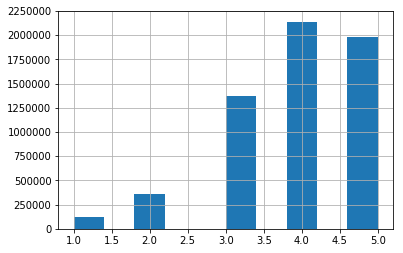

In [6]:
df.rating.hist()

**Assumption**: a score >=5 indicates that a user really liked the book

In [7]:
df['liked'] = np.where(df.rating>=5, 1, 0)

33.18% of the ratings were *liking* a book.

In [8]:
df.liked.value_counts()/df.shape[0]

0    0.668184
1    0.331816
Name: liked, dtype: float64

## Compute Recommendations

In [9]:
df_liked = df.loc[df.liked==1, ["user_id", "book_id"]]

In [10]:
df_liked.head()

,user_id,book_id
0,1,258
2,2,260
3,2,9296
8,2,301
9,2,2686


In [11]:
df_liked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983093 entries, 0 to 5976477
Data columns (total 2 columns):
user_id    int64
book_id    int64
dtypes: int64(2)
memory usage: 45.4 MB


In [12]:
recommender = item_collaborative_filtering.ItemItemCollaborativeFiltering(item_column='book_id') 

In [13]:
%%time
df_recommendations = recommender.fit_recommendations(df=df_liked, item=4081, processes=1)

CPU times: user 3.64 s, sys: 147 ms, total: 3.79 s
Wall time: 3.83 s


## Recommendations Analysis

The **top** recommender book for **4081** is the item with id **6944**

In [14]:
df_recommendations.sort_values('score', ascending=False).head()

,count_common_users,expected_common_users,item,recommended_item,score
618,7,2.666001,4081,6944,5.202784
87,8,4.878529,4081,1843,2.956299
421,14,11.614560,4081,1739,1.852191
637,3,2.163740,4081,8681,0.643214
1316,1,0.240255,4081,7980,0.147731


The **least** recommender book for **4081** is the item with id **25**

In [15]:
df_recommendations.sort_values('score', ascending=True).head()

,count_common_users,expected_common_users,item,recommended_item,score
256,13,56.462104,4081,25,-14.880124
83,19,56.507766,4081,4,-14.717812
988,11,56.645783,4081,1,-14.597654
34,15,54.759782,4081,11,-14.585931
1035,12,55.594710,4081,31,-14.577234


Let's see what the recommended items are

In [16]:
df_books = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv")

In [17]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### **Book for which recommendations are generated**

https://www.goodreads.com/book/show/231.I_am_Charlotte_Simmons

In [18]:
df_books[df_books.book_id==4081]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
4080,4081,231,231,1005335,53,312424442,9.780312e+12,Tom Wolfe,2004.0,NaN,I am Charlotte Simmons,en-US,3.4,19293,21580,1891,1481,2886,6557,6890,3766,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


### **Top recommmended book is from the same author**
It also appears in the Amazon recommendations list
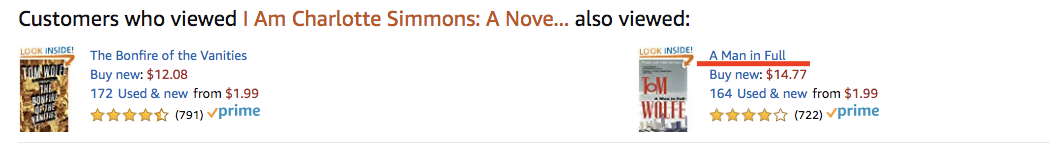

https://www.goodreads.com/book/show/86172.A_Man_in_Full

In [19]:
df_books[df_books.book_id==6944]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6943,6944,86172,86172,1997693,54,553381334,9.780553e+12,Tom Wolfe,1998.0,A Man in Full,A Man in Full,NaN,3.8,12540,13565,760,265,945,3480,5407,3468,https://images.gr-assets.com/books/1320472513m...,https://images.gr-assets.com/books/1320472513s...


### **Least recommended book: Harry Potter and the deathly hallows**

In [20]:
df_books[df_books.book_id==25]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
24,25,136251,136251,2963218,263,545010225,9.780545e+12,"J.K. Rowling, Mary GrandPré",2007.0,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...,eng,4.61,1746574,1847395,51942,9363,22245,113646,383914,1318227,https://images.gr-assets.com/books/1474171184m...,https://images.gr-assets.com/books/1474171184s...
